# Your info

Full name: Arman Heydari

Student ID: 97521252

## Loading dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
np.random.seed(1)

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X = X.T
    Y = Y.T
    return X, Y

You have:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

In [3]:
X, Y = load_planar_dataset() 
m = Y.shape[1]

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('Number of training examples: ' + str(m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
Number of training examples: 400


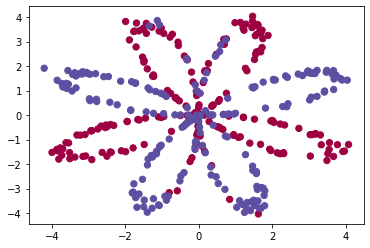

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

## Example for plotting decision boundry

In [5]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [6]:
# Train a simple logistic regression classifier with sklearn
# sklearn takes transpose of X
# sklearn takes ravel of transpose of Y
# The shape of X.T is: (400, 2)
# The shape of np.ravel(Y.T) is: (400,)

model = LogisticRegression()
model.fit(X.T, np.ravel(Y.T))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Decision Boundry')

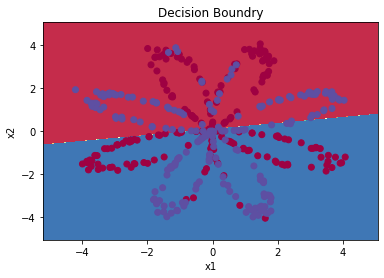

In [7]:
# Plot decision boundry on trained data
# plot_decision_boundary takes a prediction of sklearn model for anonymous input of x
# plot_decision_boundary takes X: (2, 400)
# plot_decision_boundary takes Y: (1, 400)

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Decision Boundry")

# Q1. Perceptron


*   n = number of features (here it's 2)

with this method we just initialize weights with random numbers.


In [17]:
# Q1_graded
def initialize_parameters(n):
  w = np.random.rand(n, 1)
  b = 0.0
  return w, b



*   X = features vector
*   w = weights vector
*   b = bias

using this function we can calculate w*X+b for our perceptron.



In [18]:
# Q1_graded
def forward_propagation(X, w, b):
  Z = np.dot(w.T, X) + b
  return Z

we want to use sigmoid as activation function of our neural network, so we implement it.

In [19]:
# Q1_graded
def sigmoid(Z):
  return 1.0/(1.0+np.exp(-Z))



*   Y = labels of dataset
*   y_predict = the predictions of our network


mean square error is our loss function that we can see progress of the network on each epoch with this loss function. we have to calculate the derivatives with respect to this function.

In [20]:
# Q1_graded
def mean_square_error(Y, y_predict):
  temp = np.power((y_predict - Y), 2) * (1/2)
  return np.mean(temp)

* dA = d(loss function)/d(A)
* dZ = d(A)/d(Z)
* dw = d(loss function)/d(w)
* db = d(loss function)/d(b)

we need this method to update our weights and bias in training.

In [21]:
# Q1_graded
def backward_propagation(Y, y_predict, X):
  m = X.shape[1]
  dA = y_predict-Y
  dZ = (1-y_predict)*y_predict
  dw = 1/m * np.dot(X, (dZ*dA).T)
  db = 1/m * np.sum(dZ*dA)
  return dw, db

this is the training method, inputs are hyperparameters of our network. if we want to use SGD (is_stochastic=True), then we pick a random subset (according to batch_size) of the dataset on each epoch.

In [22]:
# Q1_graded
def train_perceptron(X, Y, learning_rate, epochs, is_stochastic, batch_size):
  n, m = X.shape
  w, b = initialize_parameters(n)
  for i in range (1, epochs+1):
    if is_stochastic:
      indexes = np.random.randint(0, m, batch_size)
      x = X[:, indexes]
      y = Y[:, indexes]
    else:
      x = X
      y = Y
    Z = forward_propagation(x, w, b)
    y_predict = sigmoid(Z)
    if i%100 == 0:
      print("loss in epoch", i, ":", mean_square_error(y, y_predict))
    dw, db = backward_propagation(y, y_predict, x)
    w = w - learning_rate*dw
    b = b - learning_rate*db
  return w, b

we need a method to calculate the output of our network for any input vector(x).


*   threshold = a hyperparameter that if the output of network is bigger than that, we assume the output as 1. and if the value is lower or equal to threshold, we assume the output as 0.



In [23]:
# Q1_graded
def evaluate_model(x, w, b, threshhold):
  Z = forward_propagation(x, w, b)
  y_predict = sigmoid(Z)
  y_predict[y_predict > threshold] = 1
  y_predict[y_predict <= threshold] = 0
  return y_predict

initialize the hyperparameters with any value here:

In [24]:
# Q1_graded
learning_rate = 0.1
epochs = 1000
is_stochastic = True
batch_size = 16
threshold = 0.5

train the neural network and evaluate it on the dataset. you can see the loss is decreasing on each epoch. but accuracy is not enough, because a single perceptron is not the best approach.

In [25]:
# Q1_graded
w, b = train_perceptron(X, Y, learning_rate, epochs, is_stochastic, batch_size)
y_predict = evaluate_model(X, w, b, threshold)
print("train accuracy:", np.sum(Y == y_predict)/Y.shape[1] * 100,"%")

loss in epoch 100 : 0.13319970300011613
loss in epoch 200 : 0.1072439160667725
loss in epoch 300 : 0.12172434304586419
loss in epoch 400 : 0.11375129683806422
loss in epoch 500 : 0.09991162979266849
loss in epoch 600 : 0.11273314462368367
loss in epoch 700 : 0.12199101569876548
loss in epoch 800 : 0.13562624382264293
loss in epoch 900 : 0.12325942291953781
loss in epoch 1000 : 0.12212304399479929
train accuracy: 47.25 %


Text(0.5, 1.0, 'Decision Boundry with stochastic gradiend decent')

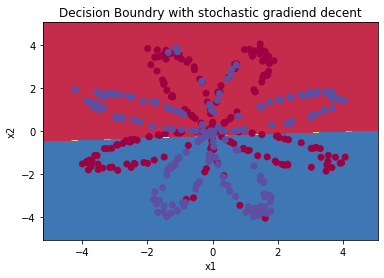

In [26]:
plot_decision_boundary(lambda x: evaluate_model(x.T, w, b, threshold), X, Y)
plt.title("Decision Boundry with stochastic gradiend decent")

# Q2. MLP

this question is similar to perceptron. so I just explain about methods which are different from before.

relu: we need this method for activation function.

In [8]:
# Q2_graded
def sigmoid(Z):
  return 1.0/(1.0+np.exp(-Z))

def mean_square_error(Y, y_predict):
  temp = np.power((y_predict - Y), 2) * (1/2)
  return np.mean(temp)

def relu(Z):
  Z[Z<0] = 0
  return Z

w and b are different in data structure here. because we have unlimited layers, I save weights and biases in dictionaries.

In [9]:
# Q2_graded
def initialize_parameters(input_features, hidden_layers, output_features=1):
  layers = [input_features]
  layers = layers + hidden_layers
  layers.append(output_features)
  w = {}
  b = {}
  for i in range(1, len(layers)):
    w[i] = np.random.rand(layers[i], layers[i-1])
    b[i] = np.zeros((layers[i], 1))
  return w, b

ii's important to use which activation function in each layer. we use sigmoid for the last layer and relu for all hidden layers.

In [10]:
# Q2_graded
def forward_propagation(X, w, b):
  Z = {0:X}
  last_layer = len(w)
  for layer in w:
    Z[layer] = np.dot(w[layer], Z[layer-1]) + b[layer]
    if layer == last_layer:
      Z[layer] = sigmoid(Z[layer])
    else:
      Z[layer] = relu(Z[layer])
  return Z

the backpropagation has to be implement in dictionaries too. and the shapes of dw and db must be same as b and w.

In [11]:
# Q2_graded
def backward_propagation(Y, Z, w, X):
  m = X.shape[1]
  last_layer = len(Z)-1
  temp = Z[last_layer]-Y
  dw = {}
  db = {}
  for layer in range(last_layer, 0, -1):
    dw[layer] = 1/m * np.dot(temp, Z[layer-1].T)
    db[layer] = 1/m * np.sum(temp, axis=1, keepdims=True)
    temp = np.dot(w[layer].T, temp)
  return dw, db

the only difference here is the hidden_layers array which is our new hyperparameter.

In [12]:
# Q2_graded
def train_mlp(X, Y, learning_rate, epochs, is_stochastic, batch_size, hidden_layers):
  n, m = X.shape
  w, b = initialize_parameters(n, hidden_layers)
  for i in range (1, epochs+1):
    if is_stochastic:
      indexes = np.random.randint(0, m, batch_size)
      x = X[:, indexes]
      y = Y[:, indexes]
    else:
      x = X
      y = Y
    Z = forward_propagation(x, w, b)
    if i%100 == 0:
      print("loss in epoch", i, ":", mean_square_error(y, Z[len(Z)-1]))
    dw, db = backward_propagation(y, Z, w, x)
    for layer in w: 
      w[layer] = w[layer] - learning_rate*dw[layer]
      b[layer] = b[layer] - learning_rate*db[layer]
  return w, b

In [13]:
# Q2_graded
def evaluate_model(X, w, b, threshold):
  Z = forward_propagation(X, w, b)
  y_predict = Z[len(Z)-1]
  y_predict[y_predict>threshold] = 1
  y_predict[y_predict<=threshold]= 0
  return y_predict

the only difference here is the hidden_layers array which is our new hyperparameter. you can enter layers with any neuron units in the hidden_layers list. for example here we have a single layer with 5 neurons. 

In [14]:
# Q2_graded
hidden_layers = [20,5,2,2]
learning_rate = 0.01
epochs = 2000
is_stochastic = False
batch_size = 32
threshold = 0.5

In [15]:
# Q2_graded
w, b = train_mlp(X, Y, learning_rate, epochs, is_stochastic, batch_size, hidden_layers)
y_predict = evaluate_model(X, w, b, threshold)
print("train accuracy:", np.sum(Y == y_predict)/Y.shape[1] * 100,"%")

loss in epoch 100 : 0.12786895336019533
loss in epoch 200 : 0.12436087515334421
loss in epoch 300 : 0.12398855608070651
loss in epoch 400 : 0.12388903177883817
loss in epoch 500 : 0.12383024833004744
loss in epoch 600 : 0.1237869402443723
loss in epoch 700 : 0.1237528591886589
loss in epoch 800 : 0.12372595138760228
loss in epoch 900 : 0.12371327611764935
loss in epoch 1000 : 0.12380907922275146
loss in epoch 1100 : 0.12391173056365457
loss in epoch 1200 : 0.12374210147967159
loss in epoch 1300 : 0.1236678253896832
loss in epoch 1400 : 0.12364026506187437
loss in epoch 1500 : 0.12363852270507493
loss in epoch 1600 : 0.12366610016517868
loss in epoch 1700 : 0.12368251164884725
loss in epoch 1800 : 0.12364487754987252
loss in epoch 1900 : 0.12360256047583626
loss in epoch 2000 : 0.12357910076619609
train accuracy: 59.25 %


Text(0.5, 1.0, 'Decision Boundry')

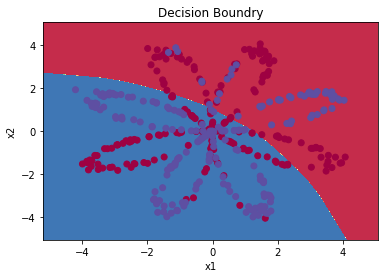

In [16]:
plot_decision_boundary(lambda x: evaluate_model(x.T, w, b, threshold), X, Y)
plt.title("Decision Boundry")

# Q3. Keras

load the dataset:

In [36]:
# Q3_graded
import tensorflow as tf
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Normalize images:

In [37]:
# Q3_graded
training_images = training_images/255.0
test_images = test_images/255.0 

now we create our model with keras implemented layers.
the question did not talk about number of hidden layers and size of them. so I choose these hyperparameters by my opinion.

In [38]:
# Q3_graded
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
# Q3_graded
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


now we can train the model. I think 50 epoch is enough for the comparisions of this question.

this is not a little dataset, so we use the stochastical mode to avoid memory leak. I turned the shuffle mode on so the model will not bias.

In [40]:
# Q3_graded
history = model.fit(
    training_images, 
    training_labels,
    epochs = 50,
    shuffle=True,
    batch_size=32,
)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7452 - accuracy: 0.7602
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5130 - accuracy: 0.8266
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4684 - accuracy: 0.8393
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4434 - accuracy: 0.8470
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4250 - accuracy: 0.8527
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4103 - accuracy: 0.8581
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3986 - accuracy: 0.8615
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3880 - accuracy: 0.8648
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8678
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.371

calculate the accuracy of our model on test data:

In [41]:
# Q3_graded
loss, accuracy = model.evaluate(training_images, training_labels)
print("train accuracy:", accuracy*100, "%")
loss, accuracy = model.evaluate(test_images, test_labels)
print("test accuracy:", accuracy*100, "%")

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2302 - accuracy: 0.9190
train accuracy: 91.89666509628296 %
313/313 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8813
test accuracy: 88.12999725341797 %


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**4PZD84**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI001_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.

#  Q4.writing question

In [ ]:
import numpy as np

X = np.array([[1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1],
              [1,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0],
              [0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1],
              [0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0]])
Y = np.array([[0,0,1,1]])
w = np.array([[0.1, 0.8, 0.7,0.2,0.9,0.3,0.2,0.8,0.9,0.3,0.2,0.8,0.4,0.5,0.6,0.3]])
b = 0

In [ ]:
Z = np.dot(w, X.T) + b
A = sigmoid(Z)
constant = (A-Y)*(1-A)*A
dw = np.dot(constant, X)
db = np.sum(constant)

In [ ]:
w = w - dw*0.5
b = b - db*0.5
print("w:",w)
print("b:",b)

In [ ]:
Xt = [1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,1]